# Train a deep neural network model to predict students' hand-written digits for the French Ministry of National Education

# 0. Data Preparation

In [51]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [10]:
# Import the MNIST dataset directly from Keras
# This is the best dataset for hand-written digits
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# Transform the data shape to (28, 28, 1)
# Then normalize the data to values between 0 and 1
# because neural network functions best within this range
X_train, X_test = X_train[..., np.newaxis] / 255.0, X_test[..., np.newaxis] / 255.0
print(X_train.shape, X_test.shape)

# Splitting the original train set further into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(48000, 28, 28, 1) (10000, 28, 28, 1)


# 1. Construct and train the model

In [5]:
# Construct the LeNet-5 model, with modifications, 
# i.e., use RelU activatoins and max pooling
# In practise, we obtained the best result by removing layer no.5

###############################################
# 1. Convolutional layer (5x5 filter, stride=2)
# 2. Max pooling layer (2x2 filter, stride=2)
# 3. Convolutional layer (5x5 filter, stride=2)
# 4. Max pooling layer (2x2 filter, stride=2)
# 5. Fully connected layer (120 nodes) <--removed
# 6. Fully connected layer (84 nodes)
###############################################

model = keras.models.Sequential([
        keras.layers.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu'),#, padding="valid"),
        keras.layers.MaxPool2D(pool_size=2, strides=2),#, padding='valid'),
        keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),#, padding="valid"),
        keras.layers.MaxPool2D(pool_size=2, strides=2),#, padding='valid'),
        keras.layers.Flatten(),
        keras.layers.Dense(84, activation='relu'),
        keras.layers.Dense(10, activation='linear'),
])

In [6]:
# Compile the model and setting loss function and optimiser
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [7]:
# See model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                21588     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8

In [12]:
# Train model
model.fit(
    X_train,
    y_train,
    batch_size=1000,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
)

Epoch 1/50
48/48 [==============================] - 9s 196ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0437 - val_accuracy: 0.9881
Epoch 2/50
48/48 [==============================] - 12s 240ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0429 - val_accuracy: 0.9885
Epoch 3/50
48/48 [==============================] - 11s 235ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0428 - val_accuracy: 0.9887
Epoch 4/50
48/48 [==============================] - 13s 263ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0428 - val_accuracy: 0.9893
Epoch 5/50
48/48 [==============================] - 11s 236ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0429 - val_accuracy: 0.9892
Epoch 6/50
48/48 [==============================] - 12s 241ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0430 - val_accuracy: 0.9893
Epoch 7/50
48/48 [==============================] - 11s 232ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0433 - val_accuracy: 0.9893


# 2. Predict and evaluate the model

In [13]:
# Evaluate the model accuracy on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0361 - accuracy: 0.9909


[0.03607165813446045, 0.9908999800682068]

**The model reaches a very satisfactory result: accuracy of 99.1%**

In [14]:
# Save the model
model.save("models/mnist_model.h5")

## 2.1 Visualize the wrong predictions

In [17]:
# Get prediction results
predictions = model.predict(X_test)
wrong_predictions = np.where(np.argmax(predictions, axis=1) != y_test)

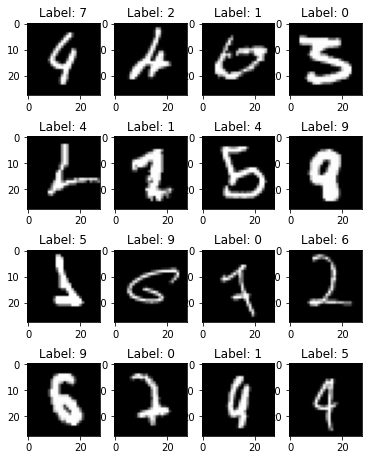

In [92]:
# Plot the first 16 wrong predicted images
size = 4

fig, axes = plt.subplots(size, size, figsize=(1.5*size,2*size))
for i in range(size**2):
    ax = axes[i//size, i%size]
    ax.imshow(np.array(X_test[wrong_predictions[0][i]], dtype='float').reshape((28, 28)), cmap='gray')
    ax.set_title('Label: {}'.format(y_test[i]))
plt.show()

# 3. Conclusion
From the visualization above, we can see that almost all wrongly predicted results were actually labeled wrongly. These explained the tiny inaccuracy of the model. As a result, the French Ministry of National Education found this deep learning model very satisfactory.